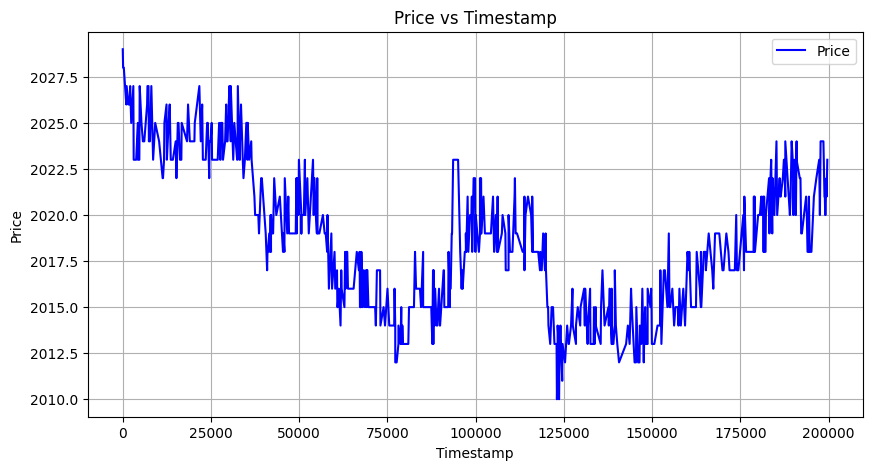

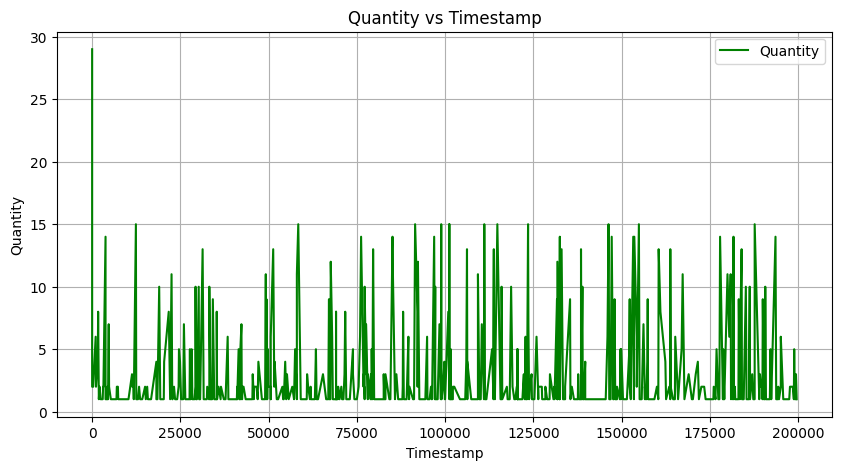

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('initial_output.csv')

# Plot price vs timestamp
plt.figure(figsize=(10, 5))
plt.plot(data['timestamp'], data['price'], label='Price', color='blue')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Price vs Timestamp')
plt.legend()
plt.grid()
plt.show()

# Plot quantity vs timestamp
plt.figure(figsize=(10, 5))
plt.plot(data['timestamp'], data['quantity'], label='Quantity', color='green')
plt.xlabel('Timestamp')
plt.ylabel('Quantity')
plt.title('Quantity vs Timestamp')
plt.legend()
plt.grid()
plt.show()

In [3]:
unique_timestamps = data['timestamp'].nunique()
print(f"Number of unique timestamps: {unique_timestamps}")

Number of unique timestamps: 536


Mean Squared Error: 2.6717728004263637
Model Coefficients: [0.1251954  0.10278807 0.12282752 0.29186807 0.31594948]


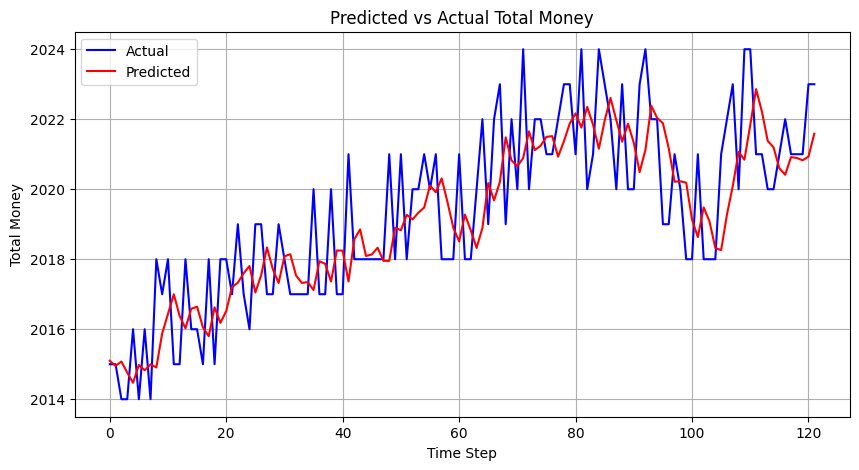

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Calculate the total money for each trade
data['total_money'] = data['price'] 

# Define the moving window size (n)
n = 5

# Prepare the data for the autoregressive model
X, y = [], []
for i in range(n, len(data)):
    X.append(data['total_money'].iloc[i-n:i].values)  # Past n values
    y.append(data['total_money'].iloc[i])            # Current value

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Train the autoregressive model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Display the coefficients of the model
print("Model Coefficients:", model.coef_)

# Plot the predictions vs actual values
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.xlabel('Time Step')
plt.ylabel('Total Money')
plt.title('Predicted vs Actual Total Money')
plt.legend()
plt.grid()

/home/threesamyak/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/threesamyak/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/threesamyak/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/threesamyak/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueW

ARIMA Model MSE: 25.614113495406716


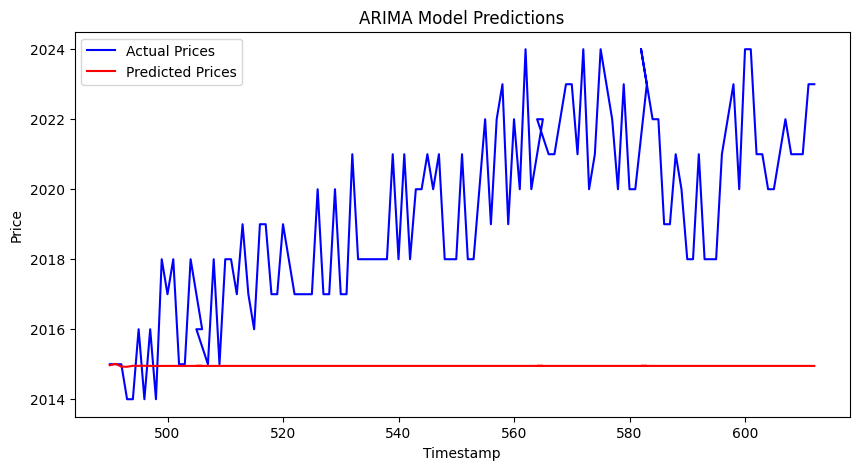

In [7]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Sort the data by timestamp
data = data.sort_values(by='timestamp')

# Extract the price column as a time series
price_series = data['price']

# Split the data into training and testing sets
train_size = int(len(price_series) * 0.8)
train, test = price_series[:train_size], price_series[train_size:]

# Fit the ARIMA model
arima_model = ARIMA(train, order=(5, 1, 0))  # (p, d, q) parameters
arima_result = arima_model.fit()

# Make predictions
predictions = arima_result.forecast(steps=len(test))

# Evaluate the model
mse = mean_squared_error(test, predictions)
print(f"ARIMA Model MSE: {mse}")

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(test.index, test, label='Actual Prices', color='blue')
plt.plot(test.index, predictions, label='Predicted Prices', color='red')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('ARIMA Model Predictions')
plt.legend()
plt.show()

In [6]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 14.2 MB/s eta 0:00:00MB/s eta 0:00:01:01
